In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 df = pd.read_csv('/content/drive/MyDrive/RNN/RSCCASN.csv',parse_dates = True, index_col = 'DATE')

In [ ]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
df.columns = ['Sales']

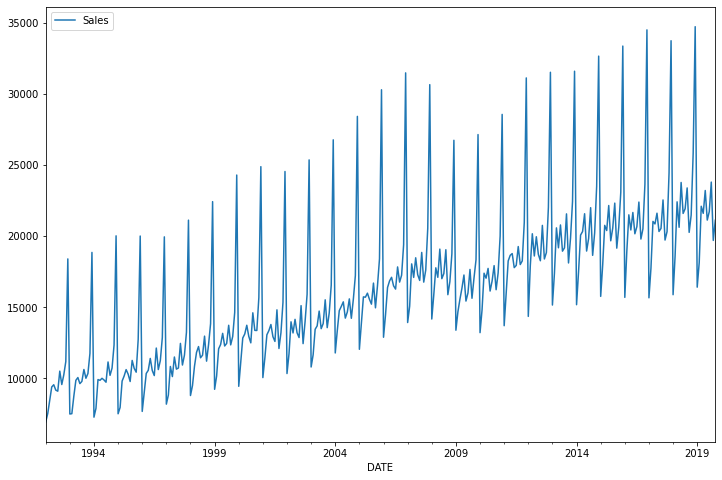

In [ ]:
df.plot(figsize = (12,8))

In [ ]:
 len(df)

334

In [ ]:
test_size = 18
test_ind = len(df) - test_size

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
# train

In [ ]:
# test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(test)

18

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length = length,batch_size = 1)

In [ ]:
X,y= generator[0]

In [ ]:
# X

In [ ]:
# y

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'relu',input_shape=(length,n_features) ))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length = length,batch_size = 1)

In [ ]:
model.fit(generator,epochs = 20, validation_data = validation_generator,callbacks = [early_stop])

Epoch 1/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0075 - val_loss: 0.0013
Epoch 2/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0028 - val_loss: 0.0068
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0047 - val_loss: 5.7469e-04
Epoch 4/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 5/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0017 - val_loss: 7.9749e-04


In [ ]:
losses = pd.DataFrame(model.history.history)

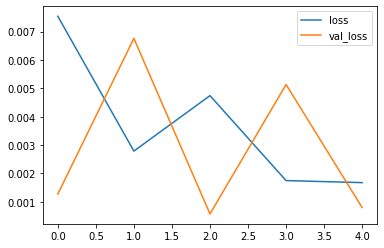

In [ ]:
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred= model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,21869.248121
2018-06-01,21589,20657.055193
2018-07-01,21919,20868.240106
2018-08-01,23381,22874.330960
2018-09-01,20260,20206.127121
2018-10-01,21473,20768.567801
2018-11-01,25831,25295.336451
2018-12-01,34706,37498.437144
2019-01-01,16410,17034.794937


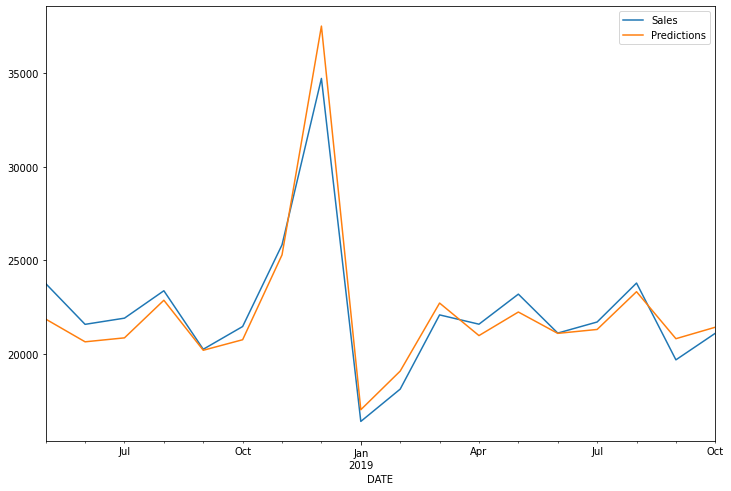

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12

generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                                length = length,batch_size =1)

In [ ]:
model = Sequential()
model.add(LSTM(100,activation = 'relu',input_shape = (length,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

model.fit_generator(generator,epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


322/322 [==============================] - 3s 6ms/step - loss: 0.0233
Epoch 2/5
322/322 [==============================] - 2s 6ms/step - loss: 0.0157
Epoch 3/5
322/322 [==============================] - 2s 7ms/step - loss: 0.0076
Epoch 4/5
322/322 [==============================] - 2s 6ms/step - loss: 0.0042
Epoch 5/5
322/322 [==============================] - 2s 6ms/step - loss: 0.0023


In [ ]:
forecast = []

periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):

  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
 forecast = scaler.inverse_transform(forecast)

In [ ]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
forecast

array([[26300.48003435],
       [35060.73997784],
       [18694.25975871],
       [19939.3467958 ],
       [22920.93204308],
       [22518.37650251],
       [23810.05805588],
       [22148.8332777 ],
       [22632.58158112],
       [24309.77238131],
       [21307.67920971],
       [22458.55440378]])

In [ ]:
forecast_index = pd.date_range(start = '2019-11-01',periods = periods,
                               freq = 'MS')

In [ ]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast,index = forecast_index,columns = ['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-11-01,26300.480034
2019-12-01,35060.739978
2020-01-01,18694.259759
2020-02-01,19939.346796
2020-03-01,22920.932043
2020-04-01,22518.376503
2020-05-01,23810.058056
2020-06-01,22148.833278
2020-07-01,22632.581581
2020-08-01,24309.772381


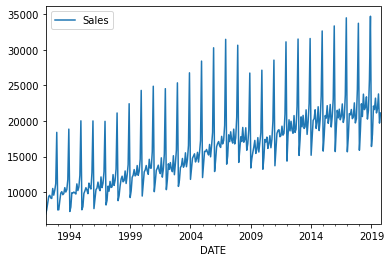

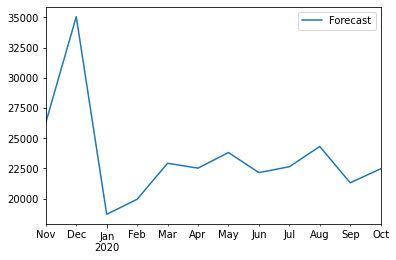

In [ ]:
df.plot()
forecast_df.plot()

(576.0, 611.0)

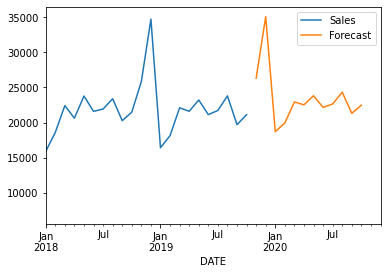

In [ ]:
ax = df.plot()
forecast_df.plot(ax =ax)
plt.xlim('2018-01-01','2020-12-01')